# creating model which can predict Fire Weather Index (FWI) in Algerian forest fire dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("updated_algerian_dataset")

In [3]:
df.drop(df.columns[0],axis=1,inplace=True)

In [4]:
df.drop([122,123],inplace=True)

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,forest
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [6]:
#we are droping some feature because these feature may not helpfull to our prediction.

df.drop(['day','month','year','Classes  '],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 244
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  243 non-null    object
 1    RH          243 non-null    object
 2    Ws          243 non-null    object
 3   Rain         243 non-null    object
 4   FFMC         243 non-null    object
 5   DMC          243 non-null    object
 6   DC           243 non-null    object
 7   ISI          243 non-null    object
 8   BUI          243 non-null    object
 9   FWI          243 non-null    object
 10  forest       243 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 22.8+ KB


In [8]:
#we have to convert these feature to int or float so we can perform mathematical operation on that dataset

In [9]:
df.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'forest'],
      dtype='object')

In [10]:
df.sample(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,forest
231,33,26,13,0.0,93.9,21.2,59.2,14.2,22.4,19.3,0
157,34,58,18,0.0,88.0,13.6,36.8,8.0,14.1,9.9,0
32,32,76,20,0.7,63.1,2.6,9.2,1.3,3.0,0.5,1
18,31,55,16,0.1,79.9,4.5,16.0,2.5,5.3,1.4,1
17,31,78,14,0.3,56.9,1.9,8.0,0.7,2.4,0.2,1


In [11]:
#converting these three feature to int
df[['Temperature', ' RH', ' Ws']]=df[['Temperature', ' RH', ' Ws']].astype('int')

In [12]:
#convert these seven feature to float
df[['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']]=df[['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']].astype('float')

In [13]:
#we converted our columns datatype succesfully
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 244
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1    RH          243 non-null    int32  
 2    Ws          243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  forest       243 non-null    int64  
dtypes: float64(7), int32(3), int64(1)
memory usage: 19.9 KB


In [14]:
df.shape

(243, 11)

In [15]:
#checking for null values
df.isnull().sum()

Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
forest         0
dtype: int64

In [16]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,forest
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.00000,243.000000,243.000000
mean,32.205761,61.930041,15.506173,0.762963,77.931276,14.718107,49.423045,4.788889,16.71358,7.052675,0.502058
std,3.603093,14.914330,2.815791,2.003207,14.350967,12.373759,47.671186,4.177597,14.21361,7.430195,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.10000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.450000,5.800000,12.350000,1.400000,6.05000,0.750000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.700000,11.300000,33.100000,3.500000,12.40000,4.700000,1.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.300000,22.65000,11.450000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.00000,31.100000,1.000000


In [17]:
#checking correlation between all feature so we can remove some unimportant featurefrom our data

df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,forest
Temperature,1.000000,-0.660116,-0.282788,-0.332942,0.678513,0.480745,0.368326,0.606881,0.453149,0.561384,-0.286362
RH,-0.660116,1.000000,0.236212,0.223174,-0.645989,-0.405293,-0.220161,-0.691222,-0.348626,-0.575731,0.407851
Ws,-0.282788,0.236212,1.000000,0.170001,-0.163998,-0.001901,0.075814,0.014637,0.029181,0.030559,0.176464
Rain,-0.332942,0.223174,0.170001,1.000000,-0.545604,-0.290077,-0.297942,-0.348682,-0.300622,-0.325531,0.040013
FFMC,0.678513,-0.645989,-0.163998,-0.545604,1.000000,0.601346,0.502868,0.739070,0.588614,0.688348,-0.228452
DMC,0.480745,-0.405293,-0.001901,-0.290077,0.601346,1.000000,0.875112,0.673484,0.982023,0.875437,-0.195433
DC,0.368326,-0.220161,0.075814,-0.297942,0.502868,0.875112,1.000000,0.497714,0.941808,0.738905,0.078890
ISI,0.606881,-0.691222,0.014637,-0.348682,0.739070,0.673484,0.497714,1.000000,0.634813,0.913495,-0.272925
BUI,0.453149,-0.348626,0.029181,-0.300622,0.588614,0.982023,0.941808,0.634813,1.000000,0.857597,-0.091133
FWI,0.561384,-0.575731,0.030559,-0.325531,0.688348,0.875437,0.738905,0.913495,0.857597,1.000000,-0.199718


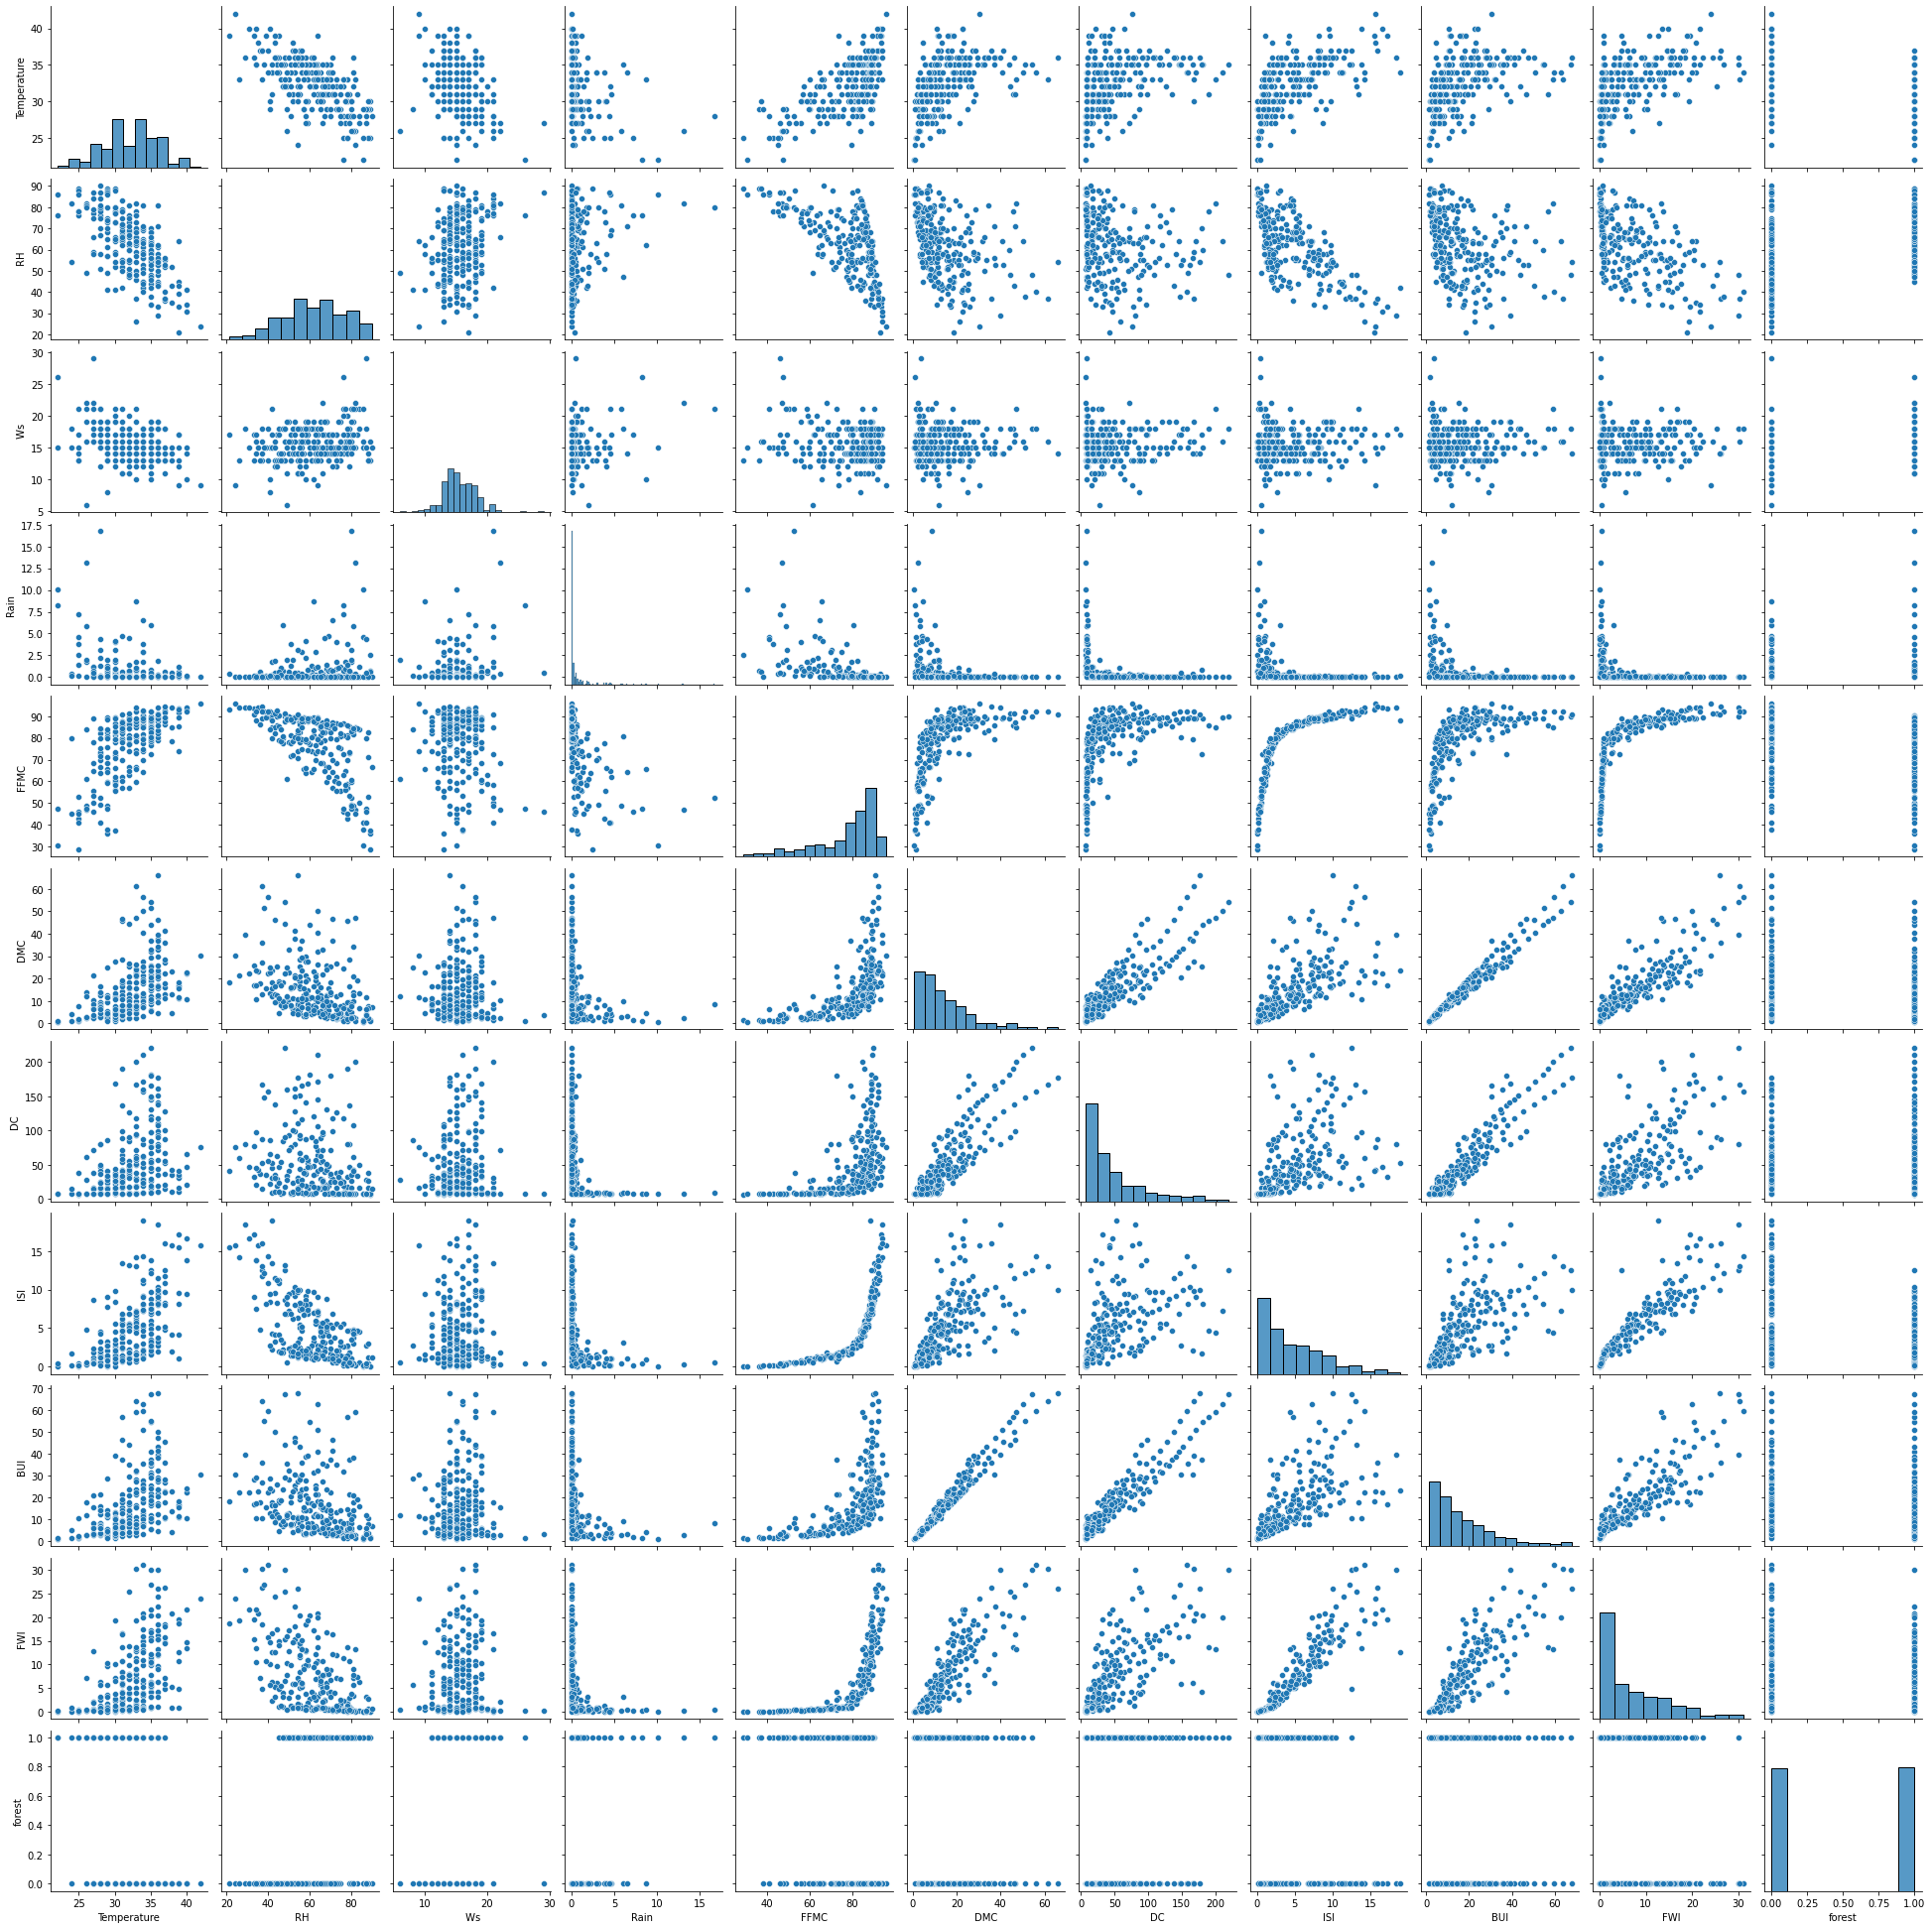

In [18]:
#we can also check with graph if any relationship occured between these features
sns.pairplot(df)

<AxesSubplot:>

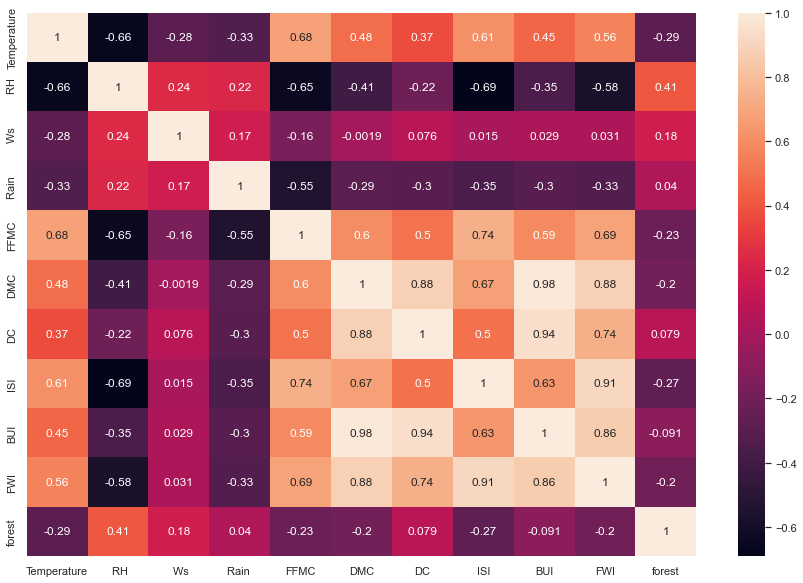

In [19]:
#we can also check with heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

In [20]:
#five  feature are highly correlated with FWI are 'FFMC' , 'DMC' , 'DC' , 'ISI' , 'BUI'
#so we are going to use these five feature for our model traing so we can make a good model which can predict Fire weather index on the bases of these five features

In [21]:
#checking linearty and regression line of data 

<AxesSubplot:xlabel='DMC', ylabel='FWI'>

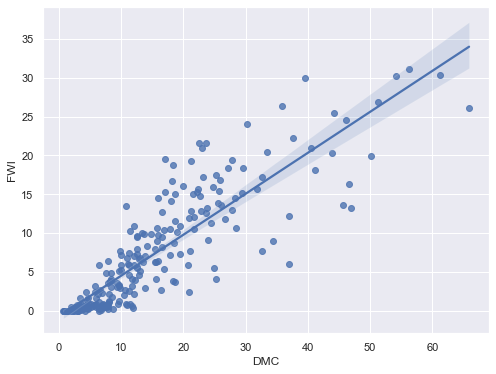

In [22]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x="DMC",y="FWI",data=df)

<AxesSubplot:xlabel='ISI', ylabel='FWI'>

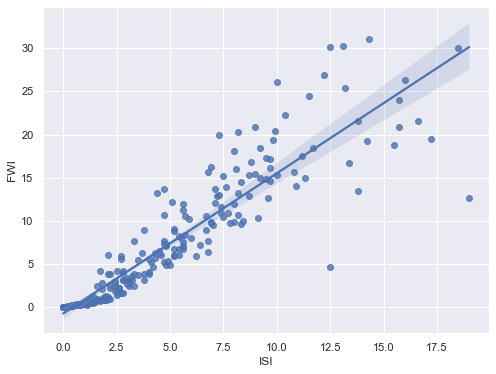

In [23]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x="ISI",y="FWI",data=df)

<AxesSubplot:xlabel='BUI', ylabel='FWI'>

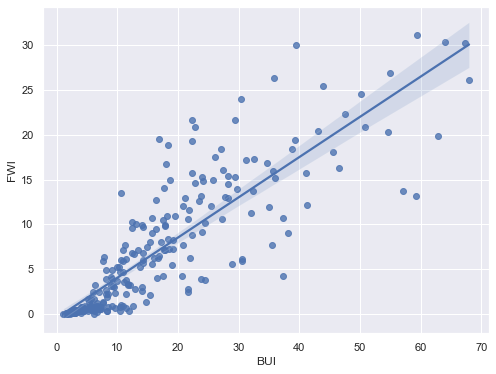

In [24]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x="BUI",y="FWI",data=df)

In [25]:
#checking outliers if any with boxplot

C:\Users\bhupe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

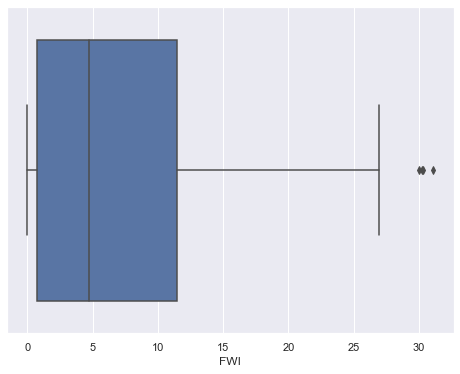

In [26]:
sns.boxplot(df['FWI'])

C:\Users\bhupe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ISI'>

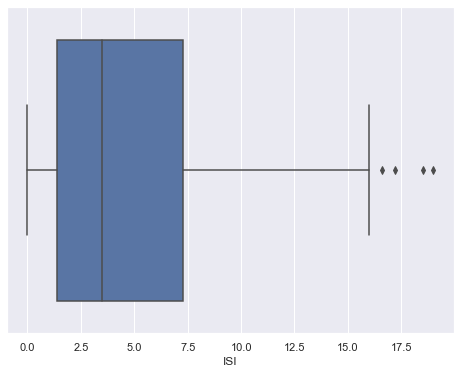

In [27]:
sns.boxplot(df['ISI'])

In [28]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,forest
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


In [29]:
#now we have to select some important feature so we can train oure model
#so we have to select some important feature which are highly correlated with our dependent feature(FWI)

In [30]:
x = df.iloc[:,4:9] #independent features ('FFMC' , 'DMC' , 'DC' , 'ISI' , 'BUI')
y = df.iloc[:,9]   #dependent features (FWI)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# we are spliting our data into train data and test data so we can check our model accuracy

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=10)

In [34]:
#sns.displot(X_train,kind='kde')

In [35]:
## standardize the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
#sns.displot(X_train,kind='kde')

In [38]:
X_test = scaler.transform(X_test)

In [39]:
#now we are ready to train our data

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
regression = LinearRegression()

In [42]:
regression.fit(X_train,y_train)

LinearRegression()

In [43]:
#print the coeff and intercept
print(regression.coef_)
print(regression.intercept_)

[-0.9215633  -2.49649372 -1.59228625  5.29146549  7.42761296]
6.832716049382718


In [44]:
# prediction for test data
reg_pred= regression.predict(X_test)

In [45]:
reg_pred

array([ 3.34887894e+00,  3.49974230e+00,  1.02946072e+01, -1.46675354e-01,
       -3.23349764e-01,  8.86667915e+00,  3.18465512e+00,  1.23084557e+01,
        6.38871108e+00,  9.45055274e-01,  1.51821399e+00,  6.48772970e+00,
        2.01925122e+01,  1.16125792e+01,  2.34531211e+00,  1.43208640e+01,
       -1.78563807e-01,  1.61287351e+01,  5.42700823e+00,  1.44543400e+00,
        4.06968188e+00,  2.62143199e+01,  1.51632559e+01,  4.38900293e+00,
        2.56647570e-01,  9.21162594e+00,  1.21863130e+00,  1.97954107e+00,
        4.37958285e-01,  1.47283947e+01,  7.01704513e+00,  4.66311624e+00,
        3.08230388e+00,  8.11323141e+00,  1.68327148e+01,  1.64212897e-01,
        1.46594039e+00,  8.81375180e-01,  1.46491330e+01,  4.41255923e-01,
        1.23152071e+01,  1.02257838e+01,  1.10322582e+01,  1.44453634e+01,
        9.49794312e+00,  2.29594015e+01,  8.35622772e-01,  1.44294054e+01,
       -2.83373975e-01,  1.99522966e+00,  5.75234241e+00,  1.39750545e+01,
        2.21431791e+00,  

#now talk about assumption of linear regression

In [46]:
#first assumption
#plt.scatter(reg_pred,y_test)
#plt.xlabel('truth_test_value')
#plt.ylabel('predicted_FWI')

C:\Users\bhupe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='FWI'>

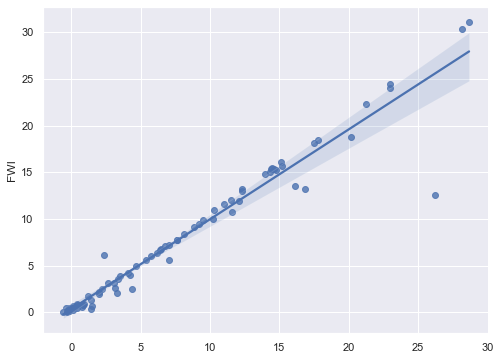

In [47]:
#this plot should be follow some linearity
sns.regplot(reg_pred,y_test)

In [48]:
## residuals
residuals = y_test-reg_pred

In [49]:
residuals

46     0.251121
227    0.400258
182    0.605393
116    0.246675
126    0.423350
         ...   
129    0.416868
243    0.075923
209    2.434170
102    0.286185
78     0.960595
Name: FWI, Length: 81, dtype: float64

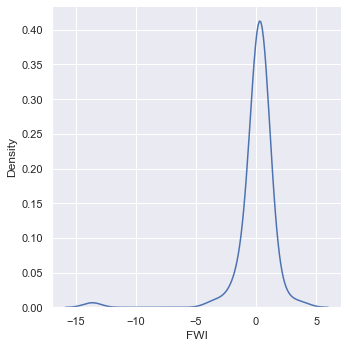

In [50]:
sns.displot(residuals,kind="kde")

In [51]:
#sns.displot(reg_pred,kind='kde')

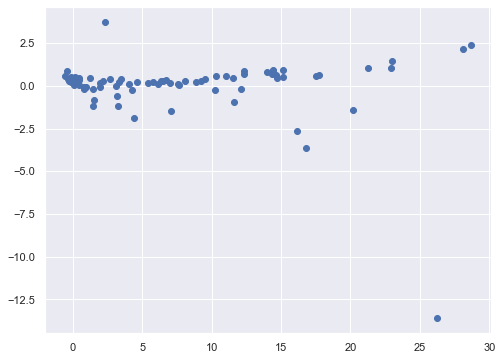

In [52]:
#scatter plot with prediction and residuals
# it should follow some unifrom distribution
plt.scatter(reg_pred,residuals)

In [53]:
# performance matrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.2012764947847168
0.8016235702471322
1.7892111375644622


In [54]:
# now checing r square and adjusted r square value for model accuracy

In [55]:
#r square
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.942465952263956


In [56]:
# adjusted r square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9386303490815531

In [57]:
## Ridge regression
from sklearn.linear_model import Ridge
ridge=Ridge()

In [58]:
ridge.fit(X_train,y_train)

Ridge()

In [59]:
ridge_pred = ridge.predict(X_test)

In [60]:
ridge_pred

array([ 3.38026794e+00,  3.59267324e+00,  1.05832871e+01, -1.40033265e-01,
       -4.01228909e-01,  9.02121474e+00,  3.16034376e+00,  1.25196643e+01,
        6.43746944e+00,  9.05479318e-01,  1.38680299e+00,  6.51220636e+00,
        2.01620668e+01,  1.14550065e+01,  8.38879753e+00,  1.41556298e+01,
       -2.05170826e-01,  1.60331928e+01,  5.40596600e+00,  1.19828542e+00,
        4.58725483e+00,  2.61207987e+01,  1.49242549e+01,  4.70403436e+00,
        5.22903772e-01,  9.28416170e+00,  1.38721609e+00,  2.01195482e+00,
        5.18993875e-01,  1.44897046e+01,  7.07271769e+00,  4.80017746e+00,
        2.92946243e+00,  8.00417869e+00,  1.64764722e+01,  3.29050974e-01,
        1.37650431e+00,  8.16341823e-01,  1.45888848e+01,  5.70419356e-01,
        1.26340127e+01,  1.00902439e+01,  1.09606944e+01,  1.45238756e+01,
        9.41433176e+00,  2.33292214e+01,  8.13520759e-01,  1.42429361e+01,
       -3.26490056e-01,  2.03415033e+00,  5.75359775e+00,  1.40990820e+01,
        2.25042738e+00,  

In [61]:
#plt.scatter(y_test,ridge_pred)

<AxesSubplot:xlabel='FWI'>

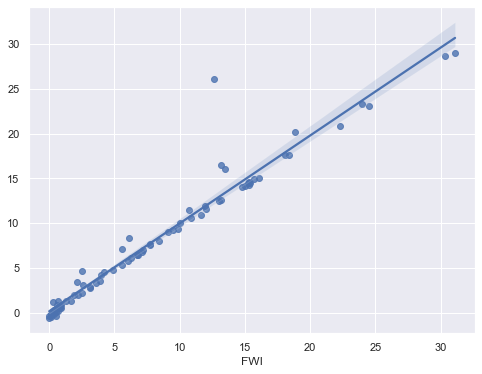

In [62]:
sns.regplot(x=y_test,y=ridge_pred)

In [63]:
#r square
from sklearn.metrics import r2_score
score = r2_score(y_test,ridge_pred)
print(score)

0.9464243676570849


In [75]:
# adjusted r square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.942852658834224

In [64]:
# lasso regression

In [65]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

In [66]:
lasso_pred=clf.fit(X_train,y_train)

In [67]:
lasso_pred

Lasso(alpha=0.1)

In [68]:
clf.coef_

array([-0.4826086 ,  0.35967562,  0.        ,  4.95425594,  2.97916051])

In [69]:
clf.intercept_

6.832716049382719

In [70]:
#elasticnet

In [71]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [72]:
X_train, y_train = make_regression(n_features=5, random_state=0)
regr = ElasticNet(random_state=7)
elas_pred = regr.fit(X_train, y_train)
ElasticNet(random_state=7)

ElasticNet(random_state=7)

In [73]:
elas_pred.coef_

array([62.16765715, 29.09380549, 12.17812319, 60.18744695, 24.57055472])

In [74]:
elas_pred.intercept_

-5.826062187195824

# conclusion

1) Here we have perform EDA and feature scalling on algerian forest fire dataset so we can create a model or predict FWI values on the basis of some independent feature.

2) so we have notice that 'FFMC' , 'DMC' , 'DC' , 'ISI' , 'BUI' these feature are highly correlated with our dependent feature(FWi) .

3) so we use these five feature as independet feature.

4) after this we split our data into train and test data.

5) we perform regression on train data.

6) after model training we check our model accuracy with dependent feature of test data with prediction values of model.

7) our model accuracy is approx 94 percent so we can say that our model is trained well.